<a href="https://colab.research.google.com/github/damlakomurcu/Projects/blob/main/project_ML_bootcamp_damlakomurcu_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project for 'Aygaz Makine Öğrenmesi Bootcamp'**
**Damla** **Kömürcü**

**Instructions** **that** **is** **needed** **to** **follow** **specified** **as** **text**. **Comments** **and** **results** **wrote** **in** *code* **as** **an** **comment**.

**Project name: Comparison of linear regression and some algorithms developed from it.**

1. Creating a Google Colaboratory File

● Make sure your project has .ipynb extension.

● Make sure that there are comment lines explaining the details in your project.

● When submitting the project, submit the cells of this .ipynb file so that the ells are run and the results are visible.

2. Importing Required Libraries

● Import the required libraries for the project to the Colab environment.

● Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#upload the dataset file.
#create a copy file to protect the original file just in case.
#Datayı inceleme
insurance = pd.read_csv('insurance.csv')
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#revising the dataset
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

● Use Label Encoding and One-Hot Encoding techniques to deal with categorical variables.

In [ ]:
#'sex', 'smoker', 'region' features are categorical variables?
# exploring these categorical variables
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
#one of drawback of One-Hot Encoding techniques compared to Label Encoding:
#   in case using the one-hot encoding: a categorical variable which has many categories will lead to a high-dimensional feature space probably.
#   For this reason:
#      For 'region'and 'smoker',Label Encoding technique is prefered to use.
#      For 'sex' ,One-Hot Encoding technique is prefered to use

In [ ]:
#to convert 'region' and 'smoker' categorical variables to numeric variables by Label Encoding technique.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region']= le.fit_transform(df['region'])
df['smoker']= le.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,3,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,1,21984.47061
4,32,male,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,1,10600.54830
1334,18,female,31.920,0,0,0,2205.98080
1335,18,female,36.850,0,0,2,1629.83350
1336,21,female,25.800,0,0,3,2007.94500


In [ ]:
#'northeast', 'northwest, 'southeast', 'southwest', = 0, 1, 2, 3
#'smoker', 'not smoker'= 1, 0

In [ ]:
#import the OneHotEncoder() function from the sklearn library.
#perform one-hot encoding on 'sex' feature.
from sklearn.preprocessing import OneHotEncoder
add_columns =pd.get_dummies(df['sex'])
df = df.join(add_columns)
df.drop(['sex'], axis=1, inplace=True)
df.head()

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,1,3,16884.92400,1,0
1,18,33.770,1,0,2,1725.55230,0,1
2,28,33.000,3,0,2,4449.46200,0,1
3,33,22.705,0,0,1,21984.47061,0,1
4,32,28.880,0,0,1,3866.85520,0,1


In [ ]:
df = df[['age',	'female', 'bmi',	'children',	'smoker',	'region',	'charges'	]]
df

,age,female,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


3. Perform An Exploratory Data Analysis

● Analyze the data and draw meaningful conclusions from the data.

● Try to use data visualization techniques as much as possible while examining the data.

● Please add the meanings you deduced from the analyzes as a comment line.


○ Examine the distribution of Bmi (Body Mass Index)

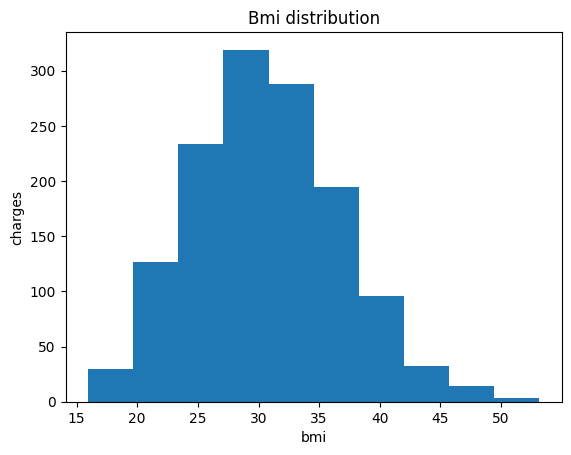

In [ ]:
#Method: Histogram.
plt.hist (df['bmi'])
plt.title('Bmi distribution')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

In [ ]:
#comment: 'bmi'  Bell-Shaped distribution means normally distributed

○ Is there an outlier in the "bmi" variable? Please review.

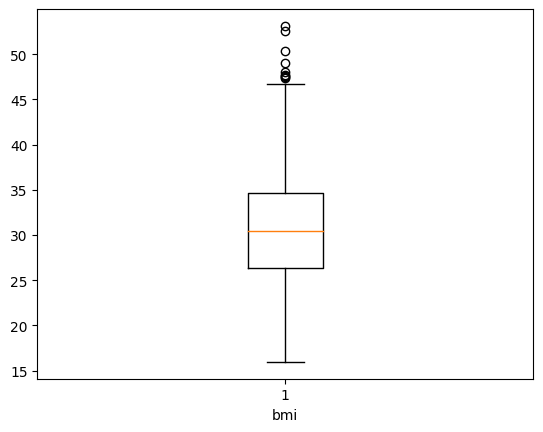

In [ ]:
#Box Plot used to see any outlier exist in 'bmi'
plt.figure()
plt.boxplot(df['bmi'])
plt.xlabel('bmi')
plt.show()

In [ ]:
#Result: Bmi data has some outlier around the value of 50.
df.describe()

,age,female,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Find the "region" with the most "children".

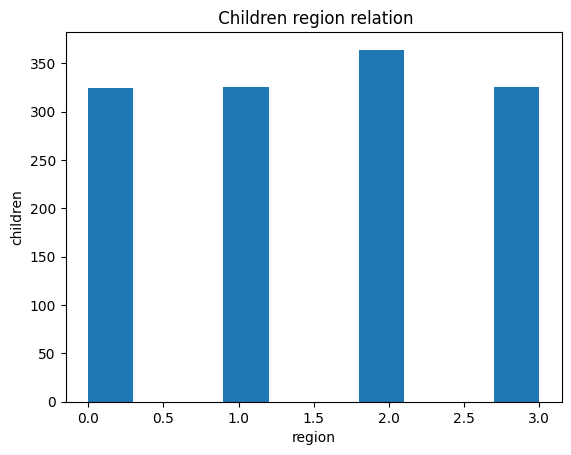

In [ ]:
#method: histogram
plt.hist (df['region'])
plt.title(' Children region relation')
plt.xlabel('region')
plt.ylabel('children')
plt.show()

In [295]:
#Result: southeast region has most children.
#'northeast', 'northwest, 'southeast', 'southwest', = 0, 1, 2, 3

Examine relation between features.

○ Examine the relationship between “smoker” and “charges”

○ Examine the relationship between “smoker” and “region”.

○ Examine the relationship between “bmi” and “sex”.

○ Examine the relationship between “age” and “bmi”.

○ Examine the relationship between “bmi” and “children”.

○ Examine the relationship between “bmi” and “charges”

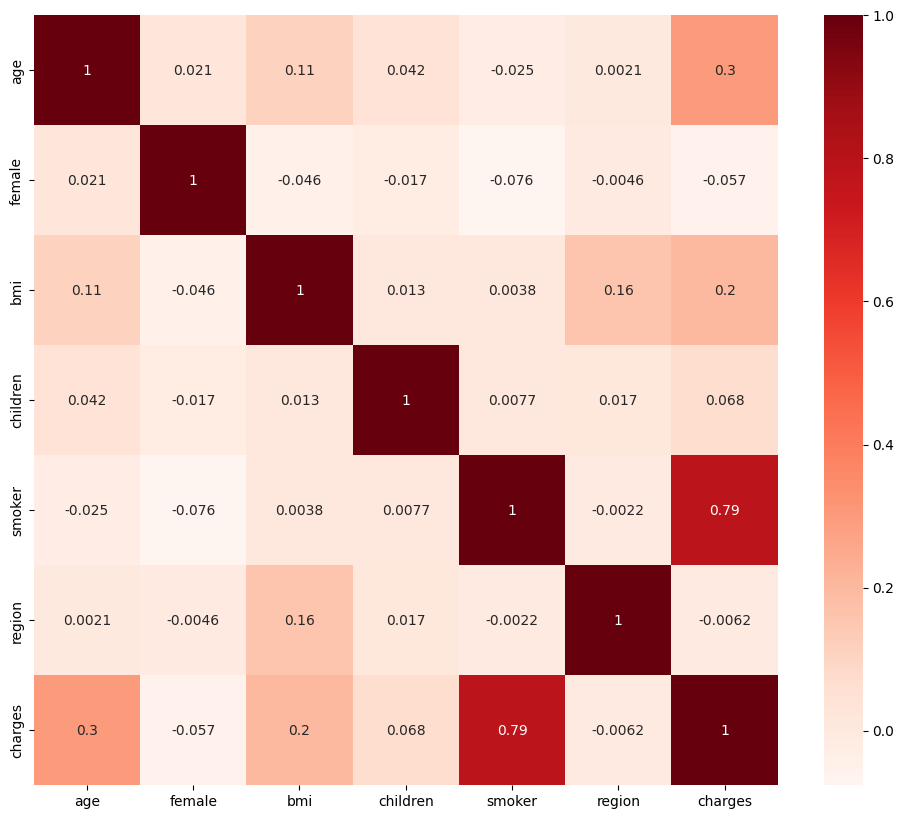

In [ ]:
#method: Pearson Correlation.
plt.figure(figsize=(12,10))
cor = df.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Comment:
#  “smoker” and “charges” have strong positive correlation with each other with 0.79 value. Since, 'charge' will be outcome; smoker will be important over outcome.
#  “smoker” and “region” have weak negative  “smoker” and “region” correlation with each other with the value of -0.0022.
#  “bmi” and “sex” have not significant correlation with each other.
#  “age” and “bmi”; “bmi” and “children”;  have weak correlation with each other.
#  “bmi” and “charges” also have weak correlation.
#  'chagers' will be outcome for the prediction model. So it is important to examine thie feature in a detail way.
#  'region', 'children' ,'sex' have really weak impact in the model.

○ Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

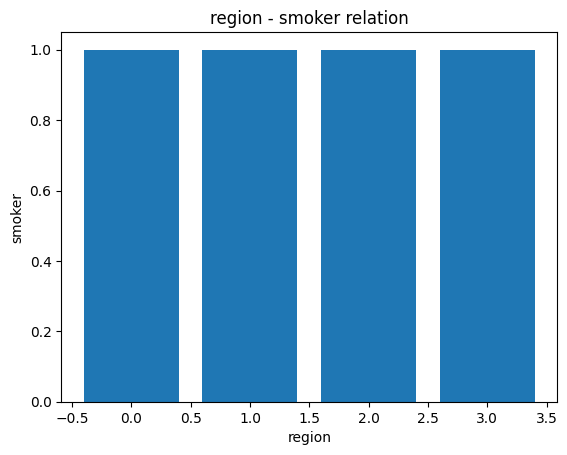

In [ ]:
#the relationship between “region”, “smoker”
import matplotlib.pyplot as plt

plt.bar( df['region'],df['smoker'])
plt.title('region - smoker relation')
plt.xlabel('region')
plt.ylabel('smoker')
plt.show()



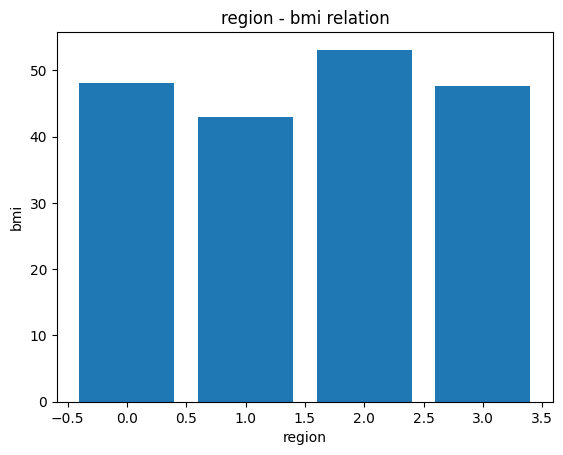

In [ ]:
#the relationship between “region”, “bmi”
import matplotlib.pyplot as plt

plt.bar( df['region'],df['bmi'])
plt.title('region - bmi relation')
plt.xlabel('region')
plt.ylabel('bmi')
plt.show()

In [ ]:
#southeast region has the highet bmi value results
#'northeast', 'northwest, 'southeast', 'southwest', = 0, 1, 2, 3
#'smoker', 'not smoker'= 1, 0

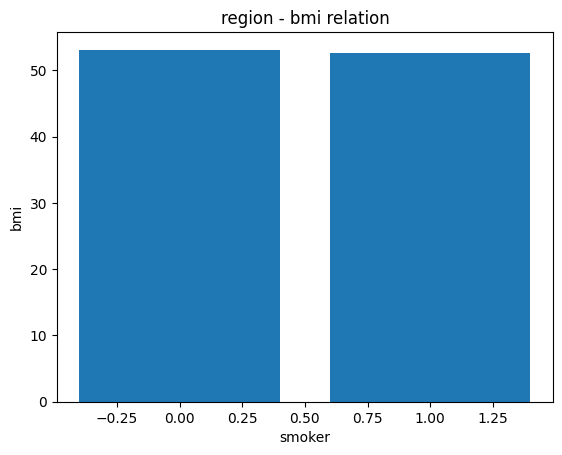

In [ ]:
#the relationship between “smoker”, “bmi”
import matplotlib.pyplot as plt

plt.bar( df['smoker'],df['bmi'])
plt.title('region - bmi relation')
plt.xlabel('smoker')
plt.ylabel('bmi')
plt.show()

4. Data Preprocessing

● In this section, prepare the data you have, for training the model.

In [ ]:
y = df['charges']
X =df.drop(['charges'], axis=1)
X

,age,female,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


● Split your dataset into X_train,X_test, y_train, y_test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y , test_size= 0.2)

● Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(df)
df=model.transform(df)
df

array([[0.02173913, 1.        , 0.3212268 , ..., 1.        , 1.        ,
        0.25161076],
       [0.        , 0.        , 0.47914985, ..., 0.        , 0.66666667,
        0.00963595],
       [0.2173913 , 0.        , 0.45843422, ..., 0.        , 0.66666667,
        0.05311516],
       ...,
       [0.        , 1.        , 0.56201238, ..., 0.        , 0.66666667,
        0.00810808],
       [0.06521739, 1.        , 0.26472962, ..., 0.        , 1.        ,
        0.01414352],
       [0.93478261, 1.        , 0.35270379, ..., 1.        , 0.33333333,
        0.44724873]])

5. Model Selection

● Select several regression models and train them with the preprocessed data

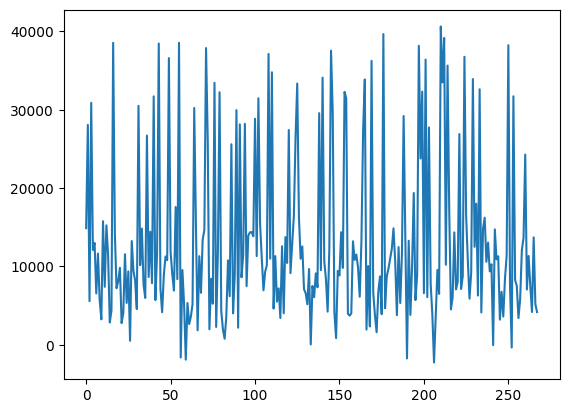

In [ ]:
#LinearRegression Prediction
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_lr
plt.plot(y_pred_lr)

In [ ]:
# Ridge Regression Prediction
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
Y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
# Lasso Regression Prediction
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
Y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
#ElasticNet Regression Prediction
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)
Y_pred_elastic = elastic_model.predict(X_test)

● Examine the performances of the selected models using cross validation.


In [ ]:
#cross validation for linear regression
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 5)
scores_lr = cross_val_score(lr_model, X, y, cv = k_folds).mean()
print(scores_lr*100,'%')

74.72559473580954 %


In [ ]:
#cross validation for Ridge Regression
scores_ridge = cross_val_score(ridge_model, X, y, cv = k_folds).mean()
print(scores_ridge*100,'%')

74.72456126693334 %


In [ ]:
#cross validation for Lasso Regression
scores_lasso = cross_val_score(lasso_model, X, y, cv = k_folds).mean()
print(scores_lasso*100,'%')

74.72638533632838 %


In [ ]:
#cross validation for ElasticNet Regression
scores_elastic = cross_val_score(elastic_model, X, y, cv = k_folds).mean()
print(scores_elastic*100,'%')

38.88627628235185 %


● Choose the best performing model

In [ ]:
#from the Cross validation results of Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression; Lasso Regression model is chosen for further analysis.

6. Hyper-parameter Optimization

● Optimize the hyper-parameters of the model selected in the previous step.

● Optimize parameters with Grid Search. (Grid Search or Randomized Search)

7. Model Evaluation

● Evaluate the optimized model using regression model evaluation metrics. (Ex. Mean Squared Error, Mean Absolute Error etc.)


In [ ]:
# grid search hyperparameters for the Lasso Regression model
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
search = GridSearchCV(lasso_model, parameters, scoring='r2', cv=cv, n_jobs=-1)
results = search.fit(X, y)
results

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.5,  3. ,
        3.5,  4. ,  4.5,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. ,
       24. ])},
             scoring='r2')

In [296]:
print(results.best_estimator_)
print(results.best_score_)

Lasso(alpha=24.0)
0.7400340867208647
